<a href="https://colab.research.google.com/github/anand008186/NLP--LLMs/blob/main/ANN/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

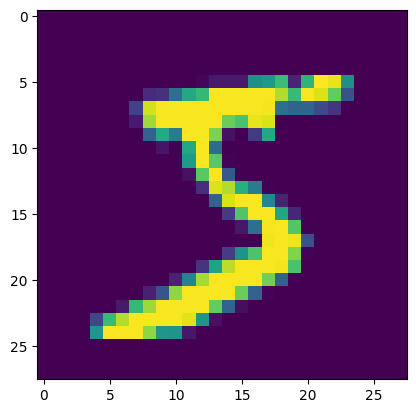

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8539 - loss: 0.4942 - val_accuracy: 0.9604 - val_loss: 0.1407
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9603 - loss: 0.1342 - val_accuracy: 0.9593 - val_loss: 0.1337
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9736 - loss: 0.0838 - val_accuracy: 0.9688 - val_loss: 0.1028
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0648 - val_accuracy: 0.9707 - val_loss: 0.0981
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9728 - val_loss: 0.0987
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0400 - val_accuracy: 0.9728 - val_loss: 0.0962
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9726 - val_loss: 0.0995
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.02

In [ ]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**bold text**

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9768